In [1]:
#pip install tensorflow

     |████████████████████████████████| 462 kB 13.5 MB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape


(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

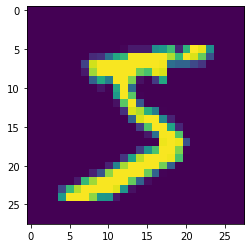

In [13]:
plt.imshow(X_train[0])

In [14]:
X_train.shape

(60000, 28, 28)

In [23]:
X_train = X_train / 255
X_test = X_test / 255

In [48]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0668 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0418 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [58]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9782


[0.08287902176380157, 0.9782000184059143]

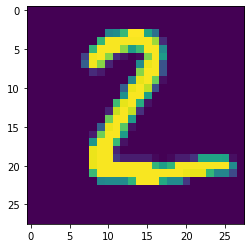

In [35]:
plt.imshow(X_test[1])

In [52]:
y_predicted = model.predict(X_test)
y_predicted[1]

array([4.0915877e-02, 3.8890406e-01, 1.0000000e+00, 2.2999030e-01,
       8.1593693e-15, 8.9475900e-02, 1.3740128e-01, 1.7516856e-09,
       2.6874483e-02, 1.6244653e-10], dtype=float32)

In [53]:
np.argmax(y_predicted[1])

2

In [54]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [59]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [60]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    0,    1,    2,    1,    1,    1,    1,    0],
       [   0, 1127,    3,    1,    0,    0,    2,    1,    1,    0],
       [   4,    1, 1009,    3,    2,    0,    3,    4,    6,    0],
       [   0,    0,    4, 1001,    0,    1,    0,    2,    1,    1],
       [   1,    1,    4,    0,  963,    0,    5,    2,    0,    6],
       [   4,    0,    0,   14,    1,  861,    5,    1,    5,    1],
       [   5,    2,    1,    1,    2,    3,  944,    0,    0,    0],
       [   2,    5,   11,    3,    3,    0,    0,  998,    2,    4],
       [   5,    0,    3,   17,    4,    6,    2,    4,  930,    3],
       [   3,    4,    0,    8,    7,    2,    0,    4,    4,  977]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

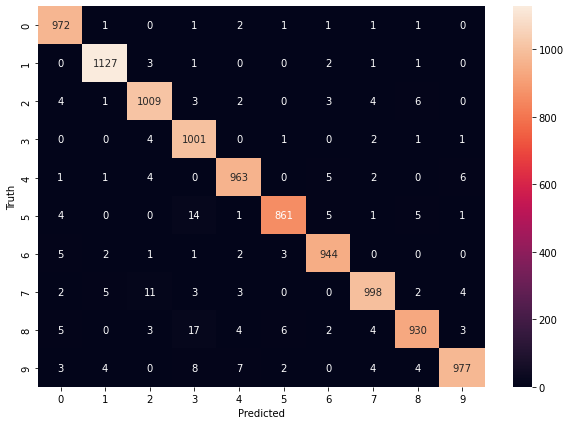

In [61]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')